In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import datetime
import cv2
import PIL
from sklearn.metrics import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,ZeroPadding2D, BatchNormalization
from tensorflow.keras import regularizers

# **Load Dataset from drive**

In [2]:
!unzip "/content/drive/MyDrive/datasets/coins_dataset.zip" -d "/content"

Archive:  /content/drive/MyDrive/datasets/coins_dataset.zip
   creating: /content/coins_dataset/
   creating: /content/coins_dataset/1/
  inflating: /content/coins_dataset/1/1.jpg  
  inflating: /content/coins_dataset/1/10.jpg  
  inflating: /content/coins_dataset/1/1017.jpg  
  inflating: /content/coins_dataset/1/104.jpg  
  inflating: /content/coins_dataset/1/105.jpg  
  inflating: /content/coins_dataset/1/106.jpg  
  inflating: /content/coins_dataset/1/109.jpg  
  inflating: /content/coins_dataset/1/11.jpg  
  inflating: /content/coins_dataset/1/110.jpg  
  inflating: /content/coins_dataset/1/111.jpg  
  inflating: /content/coins_dataset/1/114.jpg  
  inflating: /content/coins_dataset/1/115.jpg  
  inflating: /content/coins_dataset/1/116.jpg  
  inflating: /content/coins_dataset/1/117.jpg  
  inflating: /content/coins_dataset/1/118.jpg  
  inflating: /content/coins_dataset/1/119.jpg  
  inflating: /content/coins_dataset/1/120.jpg  
  inflating: /content/coins_dataset/1/125.jpg  
  i

In [3]:
import pathlib
data_dir= pathlib.Path("/content/coins_dataset")
data_dir

PosixPath('/content/coins_dataset')

# **Dataset Size:**

In [4]:
image_count =len(list(data_dir.glob('*/*')))
image_count

808

# **Dataset Visualization**

In [5]:
fives= list(data_dir.glob('5/*'))
fives[:5]

[PosixPath('/content/coins_dataset/5/77.jpg'),
 PosixPath('/content/coins_dataset/5/366.jpg'),
 PosixPath('/content/coins_dataset/5/213.jpg'),
 PosixPath('/content/coins_dataset/5/424.jpg'),
 PosixPath('/content/coins_dataset/5/596.jpg')]

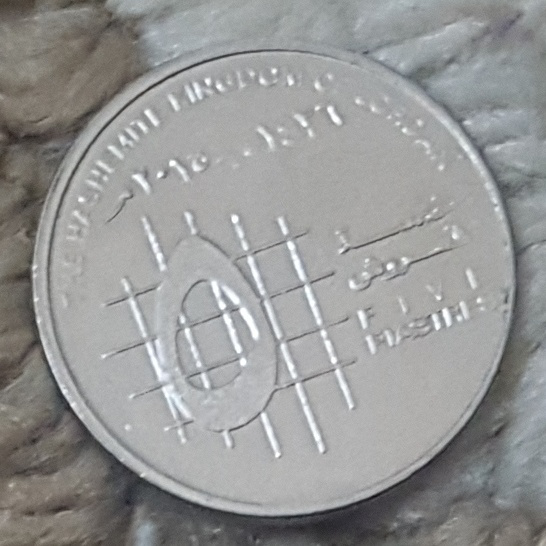

In [6]:
PIL.Image.open(str(fives[10]))

In [7]:
coins_images_dict= {
        '1': list(data_dir.glob('1/*')),
        '5': list(data_dir.glob('5/*')),
        '10': list(data_dir.glob('10/*')),
        '25': list(data_dir.glob('25/*')),
        '50': list(data_dir.glob('50/*')),
}

In [8]:
coins_labels_dict= {
        '1': 0,
        '5': 1,
        '10': 2,
        '25': 3,
        '50': 4,
}

In [9]:
str(coins_images_dict['10'][0])

'/content/coins_dataset/10/77.jpg'

In [10]:
img = cv2.imread(str(coins_images_dict['10'][0]))
img.shape

(552, 552, 3)

# **Reshape images into (224,224,3)**

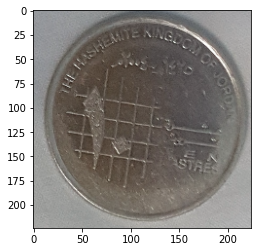

In [11]:
plt.imshow(cv2.resize(img, (224,224)))

In [12]:
X, y= [], []

for coin_label, images in coins_images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized= cv2.resize(img, (224,224))
        X.append(resized)
        y.append(coins_labels_dict[coin_label])


# **Split the dataset into train and test**

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(606, 224, 224, 3)
(202, 224, 224, 3)


In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# **Build the model**

In [48]:
num_classes = 5

model = Sequential([
    
    #CNN
    # 16 filters with size of 3x3
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # until here input is 2D, so to work with dense we need to flatten
    
    
    # Dense network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # all of the numbers above is hyper parameters and can be different
    
    # 5 neurons final output as we have 5 classes
    #linear activation
    layers.Dense(num_classes)
])

# **Compile and fit**

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('MyModel.h5', save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping(
        patience=5, 
        restore_best_weights=True)
              
history= model.fit(X_train_scaled, y_train, epochs=50,
                   validation_split=0.2,
                   callbacks= [checkpoint, early_stopping])

Epoch 1/50
16/16 [==============================] - 1s 47ms/step - loss: 1.9182 - accuracy: 0.1860 - val_loss: 1.5944 - val_accuracy: 0.2295
Epoch 2/50
16/16 [==============================] - 1s 32ms/step - loss: 1.5838 - accuracy: 0.2603 - val_loss: 1.5695 - val_accuracy: 0.2049
Epoch 3/50
16/16 [==============================] - 1s 38ms/step - loss: 1.5172 - accuracy: 0.3202 - val_loss: 1.4046 - val_accuracy: 0.4672
Epoch 4/50
16/16 [==============================] - 0s 32ms/step - loss: 1.3245 - accuracy: 0.4835 - val_loss: 1.4489 - val_accuracy: 0.4262
Epoch 5/50
16/16 [==============================] - 1s 32ms/step - loss: 1.2012 - accuracy: 0.5517 - val_loss: 1.2984 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 1s 33ms/step - loss: 1.0471 - accuracy: 0.6033 - val_loss: 1.0728 - val_accuracy: 0.5820
Epoch 7/50
16/16 [==============================] - 1s 33ms/step - loss: 0.8224 - accuracy: 0.7045 - val_loss: 0.8837 - val_accuracy: 0.6803
Epoch 8/50
16

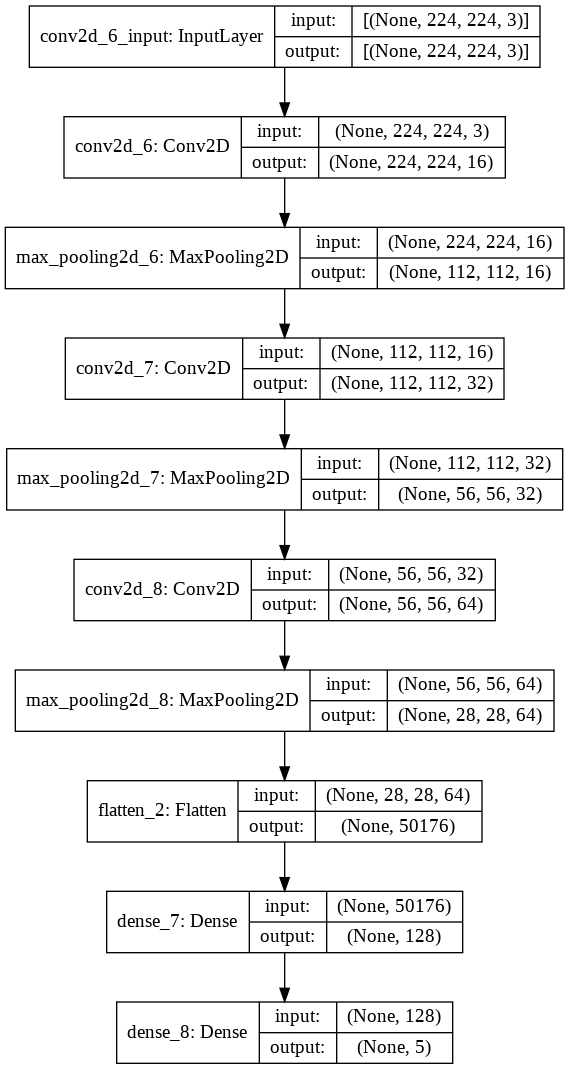

In [50]:
keras.utils.plot_model(model, "MyModel.png", show_shapes=True)

# **Evaluation on test set**

In [51]:
model.evaluate(X_test_scaled, y_test)

7/7 [==============================] - 0s 15ms/step - loss: 0.8679 - accuracy: 0.6881


[0.8679097890853882, 0.6881188154220581]

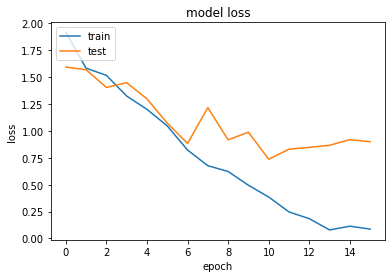

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Gain some insights**

In [53]:
predictions = model.predict(X_test_scaled)
predictions

array([[-1.9447368 , -2.9601214 , -0.3270991 ,  0.23644808,  4.266022  ],
       [-0.98876524,  8.43146   ,  3.3911924 , -5.1039715 , -0.29109833],
       [ 0.6124449 ,  2.2149582 , -4.2037215 ,  0.45890144, -0.9000211 ],
       ...,
       [ 0.23058707,  1.7877821 , -2.4856708 ,  0.56227213, -0.02776656],
       [ 4.454936  , -2.2782152 , -0.49725994, -1.4728011 ,  0.64055157],
       [ 0.98661363,  1.0194287 , -0.7163936 ,  0.74121284, -1.7097094 ]],
      dtype=float32)

predicted 0.50
label  0.50


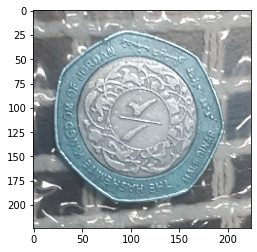

In [54]:
coinLabels= ['1','5', '10', '25', '50']
i= 13
plt.imshow(X_test_scaled[i])
score= tf.nn.softmax(predictions[i])
print("predicted " + '0.'+ str(coinLabels[np.argmax(score)]))
print("label " , '0.' + str(coinLabels[ y_test[i] ]))

# **Call the pretrained model**

In [38]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/classification/1", input_shape=IMAGE_SHAPE+(3,))
])

In [39]:
feature_extractor_model = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [43]:
num_of_classes = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              23561152  
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 10245     
Total params: 23,571,397
Trainable params: 10,245
Non-trainable params: 23,561,152
_________________________________________________________________


In [44]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


checkpoint = keras.callbacks.ModelCheckpoint('BestModel.h5',
                                             save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping(
        patience=4, 
        restore_best_weights=True)
              
history= model.fit(X_train_scaled, y_train, epochs=20,
                   validation_split=0.2,
                   callbacks= [checkpoint, early_stopping])

Epoch 1/20
16/16 [==============================] - 4s 171ms/step - loss: 1.4103 - acc: 0.4421 - val_loss: 0.8137 - val_acc: 0.6557
Epoch 2/20
16/16 [==============================] - 2s 125ms/step - loss: 0.5980 - acc: 0.8202 - val_loss: 0.5385 - val_acc: 0.8361
Epoch 3/20
16/16 [==============================] - 2s 125ms/step - loss: 0.3835 - acc: 0.8988 - val_loss: 0.4086 - val_acc: 0.8852
Epoch 4/20
16/16 [==============================] - 2s 125ms/step - loss: 0.2746 - acc: 0.9504 - val_loss: 0.3482 - val_acc: 0.9016
Epoch 5/20
16/16 [==============================] - 2s 127ms/step - loss: 0.2235 - acc: 0.9587 - val_loss: 0.2857 - val_acc: 0.9590
Epoch 6/20
16/16 [==============================] - 2s 125ms/step - loss: 0.1800 - acc: 0.9752 - val_loss: 0.2611 - val_acc: 0.9672
Epoch 7/20
16/16 [==============================] - 2s 126ms/step - loss: 0.1518 - acc: 0.9835 - val_loss: 0.2377 - val_acc: 0.9672
Epoch 8/20
16/16 [==============================] - 2s 127ms/step - loss: 0.

In [45]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 1s 98ms/step - loss: 0.1156 - acc: 0.9703


[0.11556152254343033, 0.9702970385551453]

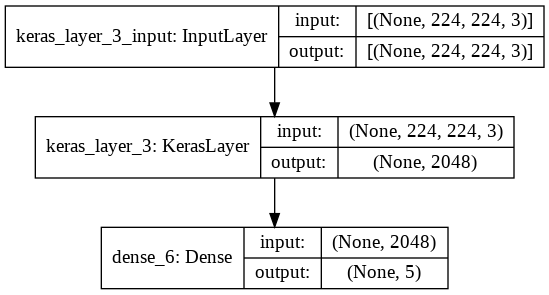

In [46]:
keras.utils.plot_model(model, "MyModelWithResnet.png", show_shapes=True)

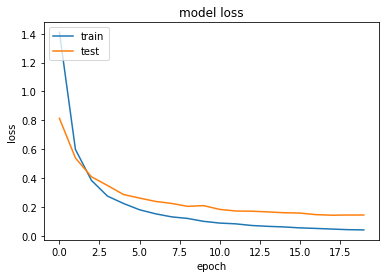

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()